# K-nearest Neighbors Classification
### On the famous iris dataset with K=5




In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.neighbors import KNeighborsClassifier 
%matplotlib notebook

<IPython.core.display.Javascript object>


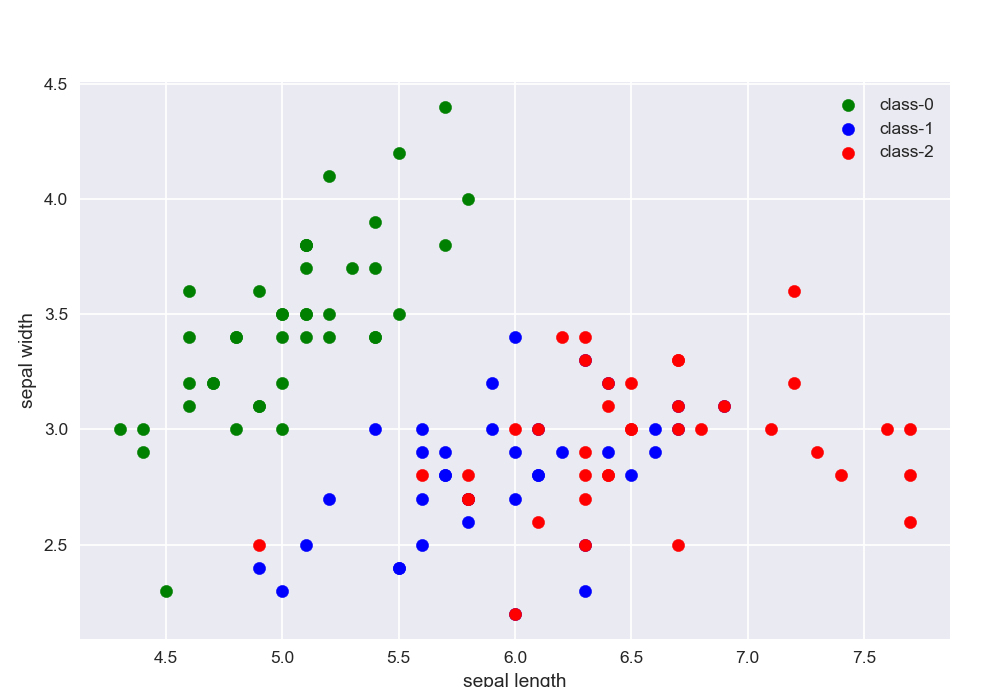

In [185]:
iris = datasets.load_iris()

X = iris['data'][:, :2]
Y = iris['target']

no_sample = len(Y)

random_index = np.random.permutation(no_sample)

# dividing the data in to test and training data sets 
no_data = int(no_sample*0.75)
x_train = X[random_index[:no_data]]
y_train = Y[random_index[:no_data]]

x_test = X[random_index[no_data:]]
y_test = Y[random_index[no_data:]]


# creating the data for plotting
X_c0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0])
y_c0 = np.zeros(x_c0.shape[0], dtype = np.int)

x_c1 = np.asmatrix([x_train[i] for i in range(len(y_train)) if y_train[i]==1])
y_c1 = np.ones(x_c1.shape[0], dtype = np.int)

x_c2 = np.asmatrix([x_train[i] for i in range(len(y_train)) if y_train[i]==2])
y_c2 = np.full(x_c2.shape[0], fill_value=2 ,dtype = np.int)

# creating the plot 
# plt.style.use('seaborn')

plt.scatter([x_c0[:,0]], [x_c0[:,1]],color='green', label = 'class-0')
plt.scatter([x_c1[:, 0]],[x_c1[:, 1]], color='blue', label = 'class-1')
plt.scatter([x_c2[:, 0]],[x_c2[:, 1]], color='red', label = 'class-2')

plt.legend()
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.show()

# x_c0[:,0].shape

In [186]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [187]:
test_pt = np.array([5.9, 2.9])
true_val = 1
predicted_val = model.predict([test_pt])
predicted_val



array([1])

Test point = [5.9 2.9]

Nearest neighbor co-ordinates : 

[[6.  2.9]
 [5.9 3. ]
 [6.  3. ]
 [5.8 2.8]
 [5.7 2.9]]

class of the nearest neighbor = [1 1 2 2 1]

predicted class of the test point = 1



<IPython.core.display.Javascript object>


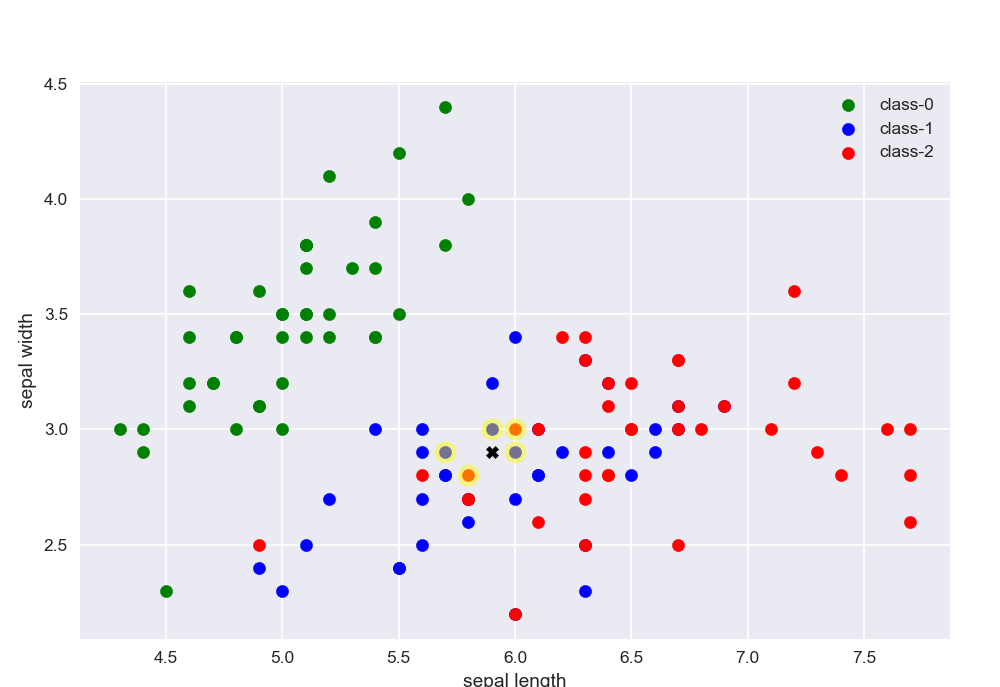

In [188]:
neighbor_object = neighbors.NearestNeighbors(n_neighbors = 5)
neighbor_object.fit(x_train)

dist_of_neighbor, indices_of_neighbour = neighbor_object.kneighbors([test_pt])

# Here indices_of_neighbour is the index x_train set which are nearest to the test point 

print(f'Test point = {test_pt}\n')
print(f'Nearest neighbor co-ordinates : \n\n{x_train[indices_of_neighbour[0]]}\n')
print(f'class of the nearest neighbor = {y_train[indices_of_neighbour[0]]}\n')
print(f'predicted class of the test point = {predicted_val[0]}\n')

plt.figure()

plt.scatter([x_c0[:,0]], [x_c0[:,1]],color='green', label = 'class-0')
plt.scatter([x_c1[:, 0]],[x_c1[:, 1]], color='blue', label = 'class-1')
plt.scatter([x_c2[:, 0]],[x_c2[:, 1]], color='red', label = 'class-2')

plt.scatter(test_pt[0], test_pt[1], marker = 'X',color='black')
plt.scatter(x_train[indices_of_neighbour[0]][:,0], x_train[indices_of_neighbour[0]][:,1], color='yellow', s=150, alpha = 0.45)

plt.legend()
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.show()


In [189]:
# my method

mis_classification = 0

for i in range(len(y_test)):
    pred_val = model.predict([x_test[i]])
    if pred_val!=y_test[i]:
        mis_classification+=1;
prct_mis = (mis_classification/len(y_test))*100

print(f'mis_classification = {prct_mis}%\n')





mis_classification = 15.789473684210526%



In [190]:
#there method 
def evaluate_performance(model, x_test, y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    return test_misclassification_percentage


In [191]:
print("Evaluating K-NN classifier:")
test_err = evaluate_performance(model, x_test, y_test)
print('test misclassification percentage = {}%'.format(test_err))

Evaluating K-NN classifier:
test misclassification percentage = 15.789473684210527%
